# Анализ компьютерных игр

## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Предстоит выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Имеются данные до 2016 года. Данные за 2016 год могут быть неполными. Планируется кампания на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных имеется аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение имеющихся данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Сразу же оценим количество и долю пропусков

In [4]:
display(data.isna().sum())
display(data.isna().mean())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

**Основные констатации:**
1. Импортированные данные соответствуют ожидаемым. Таблица с данными достаточно компактна и понятна.
2. В данных имеются значительные пропуски в части всех трех видов рейтинговых оценок (от 40% до 50% пропусков), незначительные объемы пропусков в годе выпуска (менее 1%) и ничтожные в названии игры и жанрах (всего по 2 случая). Ко всем пропускам придется применять свои подходы, обусловленные логикой данных.
3. Не все данные имеют требуемые форматы (будут исправлены на этапе подготовки данных).
4. В целом, с данными можно работать. Они достаточны для решения поставленных задач.

# Подготовка данных

### Замена названий столбцов

Столбцы названы вполне адекватным образом. Требуется только приведение к нижнему регистру.

In [5]:
data.columns = data.columns.str.lower()

### Поиск возможных скрытых дубликатов

In [6]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [7]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

В **платформах** и **жанрах** возможности для появления скрытых дубликатов не выявлено. Эти параметры в дальнейшем будут в центре анализа. Именно он требовали проверки в первую очередь.

### Замена типов данных и обработка пропусков

Замена типов потребуется в двух случаях:

* год выпуска - к целочисленному виду,
* оценка пользователей - к числовому дробному,

так как в таблице формат этих данных не соответствует их физическому смыслу.

В работе по подготовке данных будем двигаться по столбцам таблицы слева направо, заполняя пропуски и приводя данные к требуемому типу. 

Сначала в **названии игр** заменим имеющиеся два обнаруженных ранее пропуска на "неизвестную игру" ('unknown_game').

In [8]:
data['name'] = data['name'].fillna('unknown_game')
data['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'unknown_game', 'wwe Smackdown vs. Raw 2006',
       '¡Shin Chan Flipa en colores!'], dtype=object)

В названиях игр имеются такие, которые начинаются с пробелов. Это свидетельство некоторой небрежности при заполнении базы. "Почистим": удалим пробелы в тех случаях, где они являются первыми знаками в названии.

In [9]:
counter = 0
for index in range(len(data)):
    word = data.loc[index, 'name']
    if word[0] == ' ':
        data.loc[index, 'name'] = word[1:]
        counter += 1
print(f'Произведено {counter} удалений пробелов в начале названий игр.')

Произведено 6 удалений пробелов в начале названий игр.


In [10]:
display(data['name'].value_counts())

Need for Speed: Most Wanted                  12
Madden NFL 07                                 9
Ratatouille                                   9
LEGO Marvel Super Heroes                      9
FIFA 14                                       9
                                             ..
Guilty Gear XX Slash                          1
Pocket Dogs                                   1
Uta no * Prince-Sama                          1
Gold's Gym: Cardio Workout (Others sales)     1
Cruis'n                                       1
Name: name, Length: 11560, dtype: int64

Таким же образом, как и в нахваниях игр, заменим пропуски в столбце **жанры**. Произведем замены на unknown_genre.

In [11]:
data['genre'] = data['genre'].fillna('unknown_genre')
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', 'unknown_genre'], dtype=object)

В столбце **year_of_release** 269 (1,6%) пропусков. Перед заменой на целочисленный тип заполним пропуски.

На первом этапе будут заполнены пропуски лет (годов) по тем играм, которые встречаются в базе данных неоднократно. В ходе предварительного анализа были выявлены случаи, когда игра на разных платформах была выпущена в один год, однако из осторожности (на случай отклонений в годах) изберем медиану как основной медод определения пропущенного года по известным годам этой же игры.

In [12]:
gaps_before = data['year_of_release'].isna().sum()
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('median'))
gaps_after = data['year_of_release'].isna().sum()
print(f'На первом этапе заполнено {gaps_before - gaps_after} пропусков из {gaps_before}.')

На первом этапе заполнено 123 пропусков из 269.


На втором этапе заполнения пропусков будем ориентироваться на год выпуска платформы. На этом этапе уже нет игр, которые могли бы "подсказать" свой год тем, у которых пропущены значения. Но исходим из того, что, как правило, игра появляется "под новую платформу". Поэтому если известна платформа игры, то будем ориентироваться на первый год работы платформы.

In [13]:
gaps_before_2 = data['year_of_release'].isna().sum()
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('platform')['year_of_release'].transform('min'))
gaps_after = data['year_of_release'].isna().sum()
print(f'На втором этапе заполнено {gaps_before_2 - gaps_after} пропусков из {gaps_before_2}.\
    \nВсего заполнено {gaps_before - gaps_after} пропусков из {gaps_before}.')

На втором этапе заполнено 146 пропусков из 146.    
Всего заполнено 269 пропусков из 269.


Таким образом, заполнены все пропуски в столбце с годами выхода игр. Потери данных удалось избежать.

Теперь данные по годам в соответствужщем столбце (уже без пропусков) приведем к целочисленному виду.

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int')

Дальнейшая подготовка таблицы связана с пропусками в **столбцах с оценками**. Пропуски в них возникли, скорее всего в силу технических и маркетинговых причин. Система выставляет рейтинги только в случае, когда число оценок игры будет достаточно большим. Но многие игры, видимо, не самые распространенные, свои оценки не получили. Эта причина косвенно подтверждается и тем, что число пропусков в соответствующих данных по играм примерно одинаково (6-8 тыс.).

Проверим гипотезу о пропусках еще в одном аспекте. Теперь с учетом позиций 'tbd' в user_score:

In [15]:
a = data.loc[data['critic_score'].isna(), 'user_score'].count()
print(f'Превышение пропусков в critic_score над пропусками в user_score: {a}')

c = data.loc[data['user_score'] == 'tbd', 'user_score'].count()
d = data.loc[data['user_score'] == 'tbd']
e = d['critic_score'].isna().sum()
print(f'Число tbd в user_scorе: {c}\
    \nЧисло пересечений tbd в user_score и пропусков в critic_scorе: {e}')

Превышение пропусков в critic_score над пропусками в user_score: 1915
Число tbd в user_scorе: 2424    
Число пересечений tbd в user_score и пропусков в critic_scorе: 1342


Таким образом, действительно, неполные данные в user_score (вместе с 'tbd') в значительной мере совпадают с пропусками в critic_score. В частности, разница в 1915 (превышение числа пропусков в critic_score над пропусками в user_score) в значительной мере (1342) полностью совпадает с еще не выставленными оценками 'tbd'.

Для того, чтобы определиться с дальнейшими действиями относительно 'tbd', посмотрим, как этот показатель распределен по годам. Возможно, это самые свежие, еще не установленные данные (за 2016 год). Проверим.

In [16]:
# Форимируем распределение 'tbd' по годам.
years_of_tbd = data.loc[data['user_score'] == 'tbd', 'year_of_release'].value_counts().to_frame().reset_index()
years_of_tbd.columns = ['index', 'tbd_score']
# print(years_of_tbd)

# Форимируем распределение всех имеющихся данных по годам.
years_total = data['year_of_release'].value_counts().to_frame().reset_index()
# print(years_total)

# Объединяем данные в одну таблицу и вычисляем долю 'tbd' по годам.
tbd_by_years = years_total.merge(years_of_tbd, on='index', how='left')
tbd_by_years = tbd_by_years.fillna(0)
tbd_by_years['tbd_score'] = tbd_by_years['tbd_score'].astype('int')
tbd_by_years['tbd_rate_percent'] = (tbd_by_years['tbd_score'] / tbd_by_years['year_of_release']) * 100

tbd_by_years = tbd_by_years.sort_values(by='index').reset_index(drop=True)
display(tbd_by_years)

,index,year_of_release,tbd_score,tbd_rate_percent
0,1980,25,0,0.000000
1,1981,46,0,0.000000
2,1982,36,0,0.000000
3,1983,17,0,0.000000
4,1984,14,0,0.000000
5,1985,40,9,22.500000
6,1986,21,0,0.000000
7,1987,16,0,0.000000
8,1988,16,0,0.000000
9,1989,17,0,0.000000


Полученные данные опровергают предположение о том, что 'tbd' - это данные за недавнее время, которые еще не были выставлены. Наибольшая доля 'tbd'-данных приходится на период 2000-2011 годов, когда общее число оценок было наибольшим в периоде 1980-2016 годов. Тем не менее аббревитатура TBD является общепринятой: to be determined = подлежит определению. Значит, данные по этим позициям на момент формирования таблицы находились на этапе подготовки (хоть и ретроспективно) и, очевидно, они не будут нулевыми. 

В совокупности с выше приведенными соотношениями 'tbd' в пользовательских оценках и оценках критиков данное обстоятельство приводит к следующей тактике в заполнении пропусков и обработке 'tbd':
* 'tbd' в user_score заменим на технический цифровой код 100 (заведомо выпадающий из диапазона оценок),
* пропуски в critic_score по играм, которые имеют признак 'tbd', также заменим на технический цифровой индекс 500,
* все остальные пропуски в обеих колонках заменим на 0.

В дальнейшем при обработке данных, будем иметь в виду, что индексы 0, 100 и 500 имеют технический характер и не являются оценками.

In [17]:
data.loc[lambda x: x['critic_score'].isna() & (x['user_score'] == 'tbd'), 'critic_score'] = 500

replaced = data[data['critic_score'] == 500]['critic_score'].count()
print(f'Количество замен пропусков на индекс 500: {replaced}')

Количество замен пропусков на индекс 500: 1342


Количество произведенных замен в critic_score в точности равно количеству ранее определенных пересечений.

In [18]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '100'
replaced = data[data['user_score'] == '100']['user_score'].count()
print(f'Количество замен пропусков на индекс 100: {replaced}')

Количество замен пропусков на индекс 100: 2424


Количество произведенных замен 'tbd' в user_score на цифровой индекс в точности равно ранее определенному числу меток 'tbd'.

In [19]:
data['user_score'] = data['user_score'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)

data['user_score'] = pd.to_numeric(data['user_score'])
# data['user_score'].sort_values().unique()

Последняя колонка с **рейтингом** rating.

In [20]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Рейтинги в таблице полностью соответствуют системе ESRB. Единственное исключение: устаревший индекс К-А соответствует более позднему обозначениею Е.

In [21]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [22]:
skippings = data['rating'].isna().sum()
print(f'Кроме того, в колонке {skippings} пропусков, или {skippings/len(data):.1%} всех данных.')

Кроме того, в колонке 6766 пропусков, или 40.5% всех данных.


Как и в случае с 'tbd', проверим, как пропуски рейтинга группируются по годам. Для этого воспользуемся таблицей tbd_by_years, полученной при анализе 'tbd' и дополним ее пропусками рейтинга.

In [23]:
not_rated_by_yaers = data.loc[lambda x: x['rating'].isna()].groupby('year_of_release').count().reset_index()
not_rated_by_yaers.rename(columns={'year_of_release': 'index'}, inplace=True)
# not_rated_by_yaers

In [24]:
missed_by_years = pd.merge(tbd_by_years, not_rated_by_yaers[["index", 'name']], on='index')
missed_by_years['not_rated_percent'] = missed_by_years['name'] / missed_by_years['year_of_release'] * 100
missed_by_years.rename(columns={'name': 'not_rated'}, inplace=True)
missed_by_years['rated'] =  missed_by_years['year_of_release'] - missed_by_years['not_rated']
display(missed_by_years)

,index,year_of_release,tbd_score,tbd_rate_percent,not_rated,not_rated_percent,rated
0,1980,25,0,0.000000,25,100.000000,0
1,1981,46,0,0.000000,46,100.000000,0
2,1982,36,0,0.000000,36,100.000000,0
3,1983,17,0,0.000000,17,100.000000,0
4,1984,14,0,0.000000,14,100.000000,0
5,1985,40,9,22.500000,23,57.500000,17
6,1986,21,0,0.000000,21,100.000000,0
7,1987,16,0,0.000000,16,100.000000,0
8,1988,16,0,0.000000,15,93.750000,1
9,1989,17,0,0.000000,17,100.000000,0


Присвоенные рейтинги системы ESRB распределены неравномерно. Игры начальных лет их практически не имеют. Наибольшая доля рейтингов в нулевых года. И важно, что видна корредяция с позициями 'tbd' в пользовательских оценках: 'tbd' в прошлых периодах появляется там, где появляются рейтинги. Причем число рейтингов несколько превышает количество 'tbd'.

Таким образом, еще раз косвенно подтверждается предположение, что значения 'tbd' со временем будут заполнены (сначала присваеивается рейтипнг ESRB, затем появляется позиция 'tbd', после чего, со временем вместо 'tbd' должна появиться пользовательская оценка).

Ну а в таблице пропуски в последней колонке заполним с значением 'not_rated'. 

In [25]:
data['rating'] = data['rating'].fillna('not_rated')

Проверим, что получилось в итоге.

In [26]:
display(data)
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,not_rated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,not_rated
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,not_rated
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,not_rated
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,not_rated
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,not_rated


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Итоги:**

* пропуски заполнены,
* значения во всех столюцах соответствуют смысловым форматам,
* все изначальные данные сохранены,
* таблица готова к дальнейшей обработке.

### Суммирование продаж по всем регионам

In [27]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Итоги подготовки данных
1. Данные технически готовы к дальнейшей работе.
2. Пропуски в рейтингах ESRB заменены на **not_rated**.
3. Будущие оценки 'tbd' в user_score заменены на технический цифровой код **100**.
4. Соответствующие играм с 'tbd' в critic_score оценки пользователей заменены на технический цифровой код **500**.
5. Остальные отсутствующие оценки в user_score и critic_score заменены на код **0**, который также имеет технический характер.
6. Дополнительно вычислено суммарное количество продаж игр по всем трем регионам мира, по которым имелись изначальные данные.

## Шаг 3. Исследовательский анализ данных



### Выпуск игр по годам

Некоторые игры выпускались на разных платформах. Причем в разные годы. В ходе этого этапа посмотрим, сколько было выпущено (разработано и представлено рынку) игр (учет по первому году появления) и сколько выпускалось "игроплатформ" (те каждый выпуск игры на новой платформе считаем за самостоятельный выпуск игры).

In [28]:
# Подсчет количества игр по годам
games_by_year = data.groupby('name').agg({'year_of_release': 'min'}).reset_index()
games_by_year = games_by_year.groupby('year_of_release').agg({'year_of_release':'count'})
games_by_year.rename(columns={'year_of_release': 'number_of_game'}, inplace=True)
games_by_year = games_by_year.reset_index()
# display(games_by_year)

# Подсчет количества игроплатформ по годам
gp_by_year = data['year_of_release'].value_counts()
gp_by_year = gp_by_year.to_frame()
gp_by_year = gp_by_year.reset_index()
gp_by_year.rename(columns={'index': 'year_of_release', 'year_of_release':'number_of_game_platform'}, inplace=True)
# display(gp_by_year)

In [29]:
# Сведение в одну таблицу и дополнительное вычисление
games_by_year = games_by_year.merge(gp_by_year, on='year_of_release')
games_by_year['games_on_platform_ratio']\
    = games_by_year['number_of_game_platform'] / games_by_year['number_of_game']
display(games_by_year)

,year_of_release,number_of_game,number_of_game_platform,games_on_platform_ratio
0,1980,25,25,1.000000
1,1981,46,46,1.000000
2,1982,36,36,1.000000
3,1983,14,17,1.214286
4,1984,13,14,1.076923
5,1985,39,40,1.025641
6,1986,21,21,1.000000
7,1987,15,16,1.066667
8,1988,15,16,1.066667
9,1989,12,17,1.416667


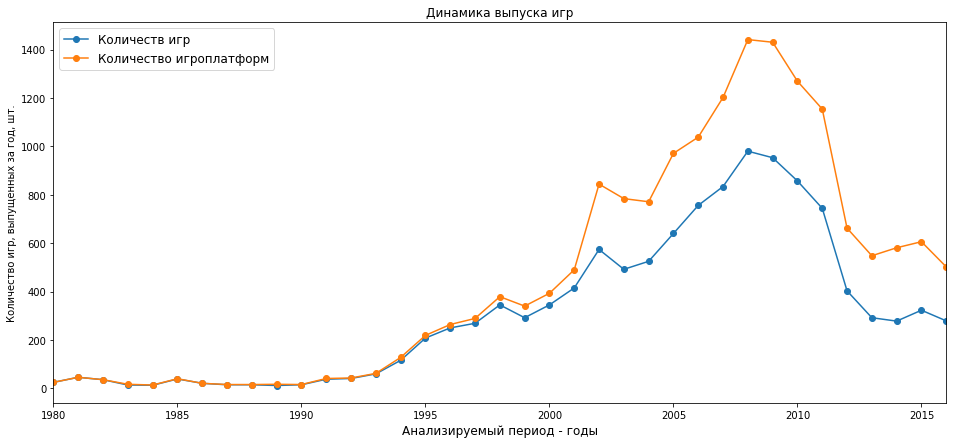

In [30]:
games_by_year.plot(x='year_of_release', y=['number_of_game', 'number_of_game_platform'],\
                   label=['Количеств игр', 'Количество игроплатформ'],\
                   style='o-', title='Динамика выпуска игр', figsize=(16, 7))
plt.legend(loc='upper left', fontsize='large')
plt.xlabel('Анализируемый период - годы', fontsize='large')
plt.ylabel('Количество игр, выпущенных за год, шт.');

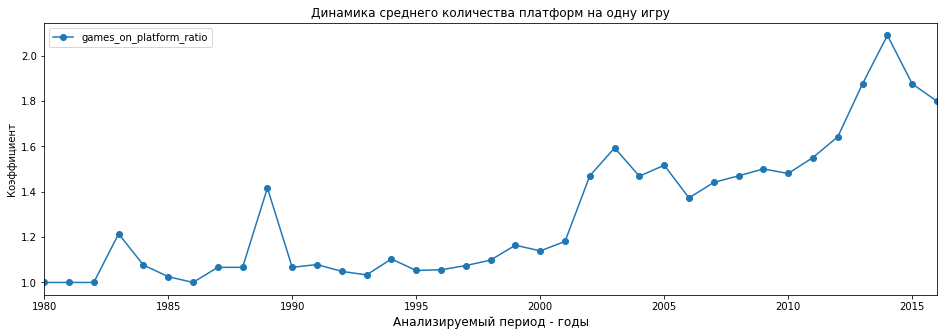

In [31]:
games_by_year.plot(x='year_of_release', y='games_on_platform_ratio',\
                   style='o-', title='Динамика среднего количества платформ на одну игру', figsize=(16, 5))
plt.xlabel('Анализируемый период - годы', fontsize='large')
plt.ylabel('Коэффициент');

**Выводы**

Анализ показал ускоряющуюся динамику с 1980 по 2008 год. После чего последовал "провал" в 2009-2012 года, после чего темпы выпуска новых игр опустились до уровня конца 1990-х годов. С 2013 года ситуация относитьельно стабильна (выпускается около 300 игр в год).

Вместе с тем, по мере развития "игорного" дела на протяжении всего анализируемого периода увеличивается число платформ, на котором выпускается каждая игра. В период 2013-2016 годов он составляет около 1,8 (то есть каждая новая игра в среднем выпускается почти на двух платформах), что ведет к большему разнообразию предложения.

В конечном итоге, период 2013-2016 годов характеризует актуальный уровень активности призводителей (разработчиков) в игровом деле.

### Продажи по годам

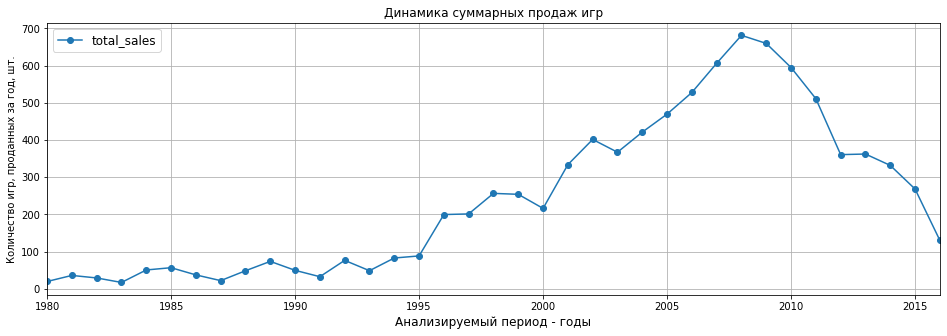

In [32]:
total_sales_by_years = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

total_sales_by_years.plot(style='o-', title='Динамика суммарных продаж игр', figsize=(16, 5))
plt.legend(loc='upper left', fontsize='large')
plt.grid()
plt.xlabel('Анализируемый период - годы', fontsize='large')
plt.ylabel('Количество игр, проданных за год, шт.');

При анализе следует учесть, что данные за 2016 год неполные.

**Выводы**
1. Пик на рынке продаж компьютерных игр пришелся на 2005-2011 годы.
2. С 2010 года наблюдается резкий спад, особенно по итогам 2012 года.
3. 2013 год - остановка спада, после чего снижение продаж продолжается (и к кконцу анализируемого периода находится на уровне середины 1990-х годов).

### Продажи по платформам

Посмотрим, как менялись продажи по платформам.

In [33]:
platform_data = data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').reset_index()
platform_data = platform_data.fillna(0)
platform_data.columns = platform_data.columns.map(lambda x: str(x)) # Преобразование названий колонок 'int' в 'str'
platform_data['platform_total_sales'] = platform_data.loc[:, '1980':'2016'].sum(axis=1)
# display(platform_data)

На основе сводных данных выберем платформ с суммарными продажами свыше 500 млн копий и построим **распределение продаж по годам**.

In [34]:
sales_over_500 = platform_data.loc[platform_data['platform_total_sales'] > 500].reset_index(drop=True)
print(f'Продажи свыше 500 млн копий имеют {len(sales_over_500)} платформ из {len(platform_data)}.')
display(sales_over_500)

Продажи свыше 500 млн копий имеют 6 платформ из 31.


year_of_release,platform,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,platform_total_sales
0,DS,0.0,0.0,0.0,0.0,0.0,1.86,0.0,0.0,0.0,...,145.36,119.56,85.35,26.33,11.67,1.54,0.00,0.00,0.00,806.12
1,PS,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,730.86
2,PS2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1255.77
3,PS3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82,3.60,939.65
4,Wii,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,177.68,206.97,128.67,59.79,22.94,8.59,3.75,1.14,0.18,907.51
5,X360,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,136.07,120.82,170.55,145.23,100.72,88.58,34.74,11.96,1.52,971.42


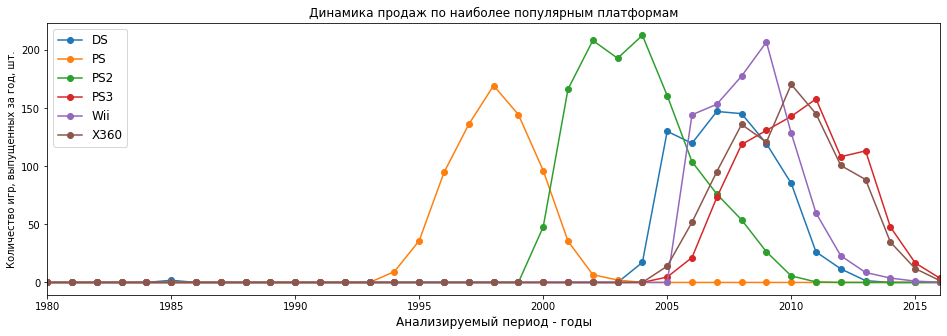

In [35]:
# Подготовка данных
sales_over_500 = sales_over_500.set_index('platform')
sales_over_500 = sales_over_500.drop(columns='platform_total_sales')
sales_over_500 = sales_over_500.transpose()
# display(sales_over_500)

sales_over_500.plot(style='o-', title='Динамика продаж по наиболее популярным платформам', figsize=(16, 5))
plt.legend(loc='upper left', fontsize='large')
plt.xlabel('Анализируемый период - годы', fontsize='large')
plt.ylabel('Количество игр, выпущенных за год, шт.');

Наиболее популярные платформы имеют примерно схожий график жизненноого цикла. Ускоренный рост продаж в начальный период, замедление, достижение максимума, после чего ускоряющийся спад продаж, но к самому концу жизненного цикла скорость спада замедляется (видимо, в это время еще остаются "консервативные" покупатели игр на данной платформе).

В сущности, график продаж большинства игр на популярных платформах имет колоколообразный вид. Распределение продаж по годам схоже с Гауссовым. Хотя, конечно, есть и явные отклонения от классического вида.

Исключение составляет платформа DS, продажи игр на основе которой начались неудачно (в 1985 году продано менее 2 млн экземпляров), но через 20 лет производители вернулись к этой платформе и добились признания и успеха.

Рассчитаем медианную **длительность жизненного цикла платформы**. Для этого возьмем только те из платформ, которые уже завершили свой жизненный цикл, т.е. не продавались в 2016 году (было продано менее 1 млн копий) при этом общие продажи учитываемых платформ за весь период составили более 1 млн копий (отсечение малозначимых платформ).

In [36]:
platform_data_stoped = platform_data.loc[(platform_data['2016'] < 1) & (platform_data['platform_total_sales'] > 1)].reset_index()

# Расчет количества лет в продаже. 36 - полное количество лет в базе данных с 1980 по 2015 включительно..
platform_data_stoped['years_of_live'] = 36 - platform_data_stoped.loc[:, '1980':'2016'].eq(0.0).sum(axis=1)
platform_data_stoped['years_of_live'].describe()

count    19.000000
mean      7.473684
std       3.306029
min       1.000000
25%       5.500000
50%       8.000000
75%      10.000000
max      12.000000
Name: years_of_live, dtype: float64

Таким образом, средняя длительность жизненного цикла игровой платформы (в период 1980-2015 гг.) составляла 7,5 лет, мединанная - 8 лет. "Долгожители" дотягивали до 12 лет, а "однодневки" сгорали за год.

### Определение актуального периода для прогноза

Ранее, в ходе анализа динамики продаж, установлено, что после существенного падения активности производителей в 2009-2012 гг. он стабилизировался, и в период 2013-2016 гг. существенных колебаний не отмечается. 

Важны три обстоятельства:
* разработка (выпуск) игр стабилизировались на сравнительно низком уровне (резкое сжатие прекратилось),
* понижательная динамика по тенденции 2013-2016 гг. незначительная,
* снижение выпуска в 2016 г. по сравнению с 2015 г. составило около 5%, но это не неполных данных, так что снижения, скорее всего, в 2016 г. нет.

Таким образом, в 2013-2016 гг. выпуск игр стабилен.

Вместе с тем, продажи в этот период явно снижаются. Рынок сжался более чем в 1,5 раза (с учетом неполных данных за 2016 год). Вместе со стабильным выпуском новинок эти обстоятельства свидетельствуют о росте конкуренции на рынке и, следовательно, снижении рентабельности бизнеса. Значит, вероятность появления принципиально новых платформ невелика, а перспективы имеет модернизация действующих платформ.

В итоге, период 2013-2016 гг. стабилен по величине выпуска и имеет однонаправленную стабильную динамику сжатия по продажам. В этом плане можно считать его однородным и пригодным для выбора в качестве периода для прогноза.

Кроме того подкрепим выбор следующими обстоятельствами.
1. Этот 4-летний период соответствует примерно половине длительности жизненного цикла платформы, что позволяет обоснованно использовать тенденции этого периода в данном конкретном анализе. 
2. Соотношение длительностей горизонта прогнозирования (в работе 1 год) и фактических данных прошлых периодов (4 года) на уровне 1:4 соответствует классическим подходам в прогнозировании.

### Анализ актуальной динамики платформ (2013-2016 гг.)

In [37]:
# Формирование таблицы
data_4_years = data.loc[data['year_of_release'] >= 2013]
platforms_4_years = data_4_years.pivot_table(index='platform',\
                                             columns='year_of_release', values='total_sales', aggfunc='sum').fillna(0)

# Расчет дополнительных данных
platforms_4_years['total_sales_2013_2016'] = platforms_4_years.loc[:, 2013:2016].sum(axis=1)

total_sales_2015 = platforms_4_years[2015].sum()
platforms_4_years['market_share_2015'] = platforms_4_years[2015] / total_sales_2015 * 100


platforms_4_years.columns = platforms_4_years.columns.map(lambda x: str(x)) # Преобразование названий колонок 'int' в 'str'

display(platforms_4_years)

year_of_release,2013,2014,2015,2016,total_sales_2013_2016,market_share_2015
platform,,,,,,
3DS,56.57,43.76,27.78,15.14,143.25,10.366445
DS,1.54,0.00,0.00,0.00,1.54,0.000000
PC,13.01,13.28,8.52,5.25,40.06,3.179342
PS3,113.25,47.76,16.82,3.60,181.43,6.276588
PS4,25.99,100.00,118.90,69.25,314.14,44.368983
PSP,3.38,0.24,0.12,0.00,3.74,0.044779
PSV,10.59,11.90,6.25,4.25,32.99,2.332264
Wii,8.59,3.75,1.14,0.18,13.66,0.425405
WiiU,21.65,22.03,16.35,4.60,64.63,6.101202


На основе полученных данных констатируем следующее.
1. новые платформы с 2013 года не появалялись, выпуск новых игр ведется на ранее созданных платформах,
2. завершили свой жизненный цикл и более не продаются: DS, PSP,
3. находятся на спаде жизненного цикла: 3DS, PS, PS3, Wii, WiiU, X360,
4. сохраняют потенциал на несколько лет: PS4, XOne,
5. ни одна из платформ не находится на этапе подъема или пика жизненного цикла (PS4 и XOne только начали отход от пика),
6. лидируют по продажам PS4 (рыночная доля по итогам 2015 года 44%), XOne (22%) и 3DS (10%).
7. происходит монополизация и стандартизация рынка платформ: три из одиннадцатьи платформ занимают более 75% рынка.

С учетом данных констатаций потенциально прибыльными могут быть последующие поколения PS4 и XOne. 

### Распределение глобальных продаж игр

In [38]:
platforms_4_years['total_sales_2013_2016'].describe()

count     11.000000
mean      99.232727
std       97.454148
min        1.540000
25%       23.325000
50%       64.630000
75%      151.285000
max      314.140000
Name: total_sales_2013_2016, dtype: float64

Построим "ящик" с усами по продажам игр за 4 года - продажи платформ.

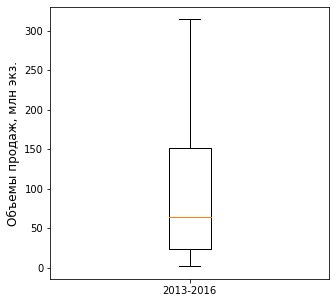

In [39]:
fig = plt.figure(figsize =(5, 5))
plt.ylabel('Объемы продаж, млн экз.', fontsize='large')
plt.boxplot(platforms_4_years['total_sales_2013_2016'], labels=['2013-2016']);

Примечательно, что выбросов нет вообще, распределение сильно скошено влево (и медианное значение находится значительно левее, чем среднее). Это говорит о том, что несколько платформ с высокими продажами оказывают существенное влияние на рынок. При этом большинство платформ довольствуются малыми и средними продажами.

Далее посмотрим на "ящики с усами" в динамике по годам.

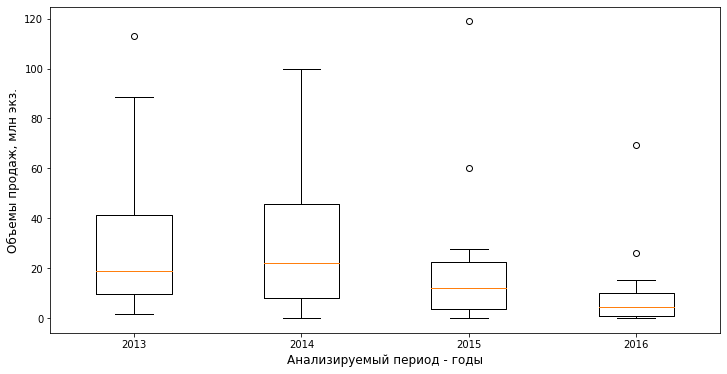

In [40]:
platforms_4_years_for_box = platforms_4_years.loc[:, '2013':'2016']
platforms_4_years_for_box = platforms_4_years_for_box.transpose()
# display(platforms_4_years_for_box)

fig = plt.figure(figsize =(12, 6))
plt.xlabel('Анализируемый период - годы', fontsize='large')
plt.ylabel('Объемы продаж, млн экз.', fontsize='large')
plt.boxplot(platforms_4_years_for_box, labels=['2013', '2014', '2015', '2016']);

В 2015 и 2016 годах две платформы (PS4 и XOne) вырвались за пределы "усов". Они стали яроковыраженными лидерами рынка. В 2013 году такие же позиции были у PS3 (X360 оказалась на границе выброса, но всё-таки внутри верхнего предела полутораквартильного расстояния от 3-го квартиля). В 2014 году статистически значимых (на уровне выбросов) лидеров не было.

Для итога же важно, что и с точки зрения статистического анализа PS4 и XOne стали доминирующими платформами в 2015 и 2016 гг.

**«Ящик с усами» по глобальным продажам игр в разбивке по платформам**

Для статистического анализа результатов глобальных продаж игр отберем те из них, кторые характеризуются наиболее значимыми продажами (более 100 млн экз. за те 4 года в период 2013-2016 гг.): 

In [41]:
platforms_for_boxplot = platforms_4_years.loc[platforms_4_years['total_sales_2013_2016'] > 100].reset_index()
platforms_for_boxplot = list(platforms_for_boxplot['platform'])
display(platforms_for_boxplot)

['3DS', 'PS3', 'PS4', 'X360', 'XOne']

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


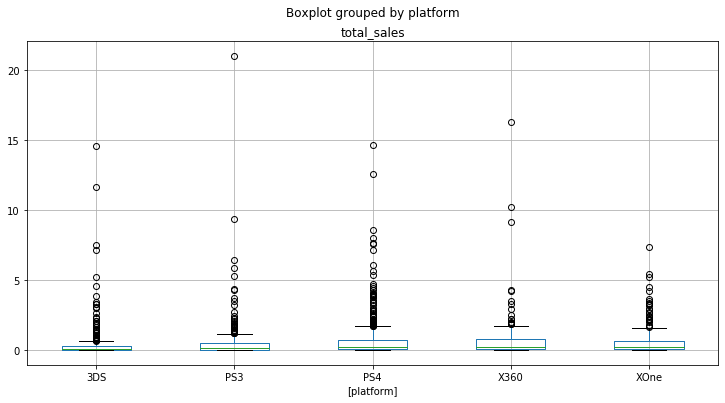

In [42]:
data_4_years_main = data_4_years.query('platform == @platforms_for_boxplot') # Отбор "главных" платформ

data_for_boxplot = data_4_years_main.pivot_table(index=['platform', 'name'], values='total_sales').reset_index()
data_for_boxplot = data_for_boxplot.drop(columns=['name'])
# display(data_for_boxplot)
data_for_boxplot.boxplot(by="platform", figsize =(12, 6));

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


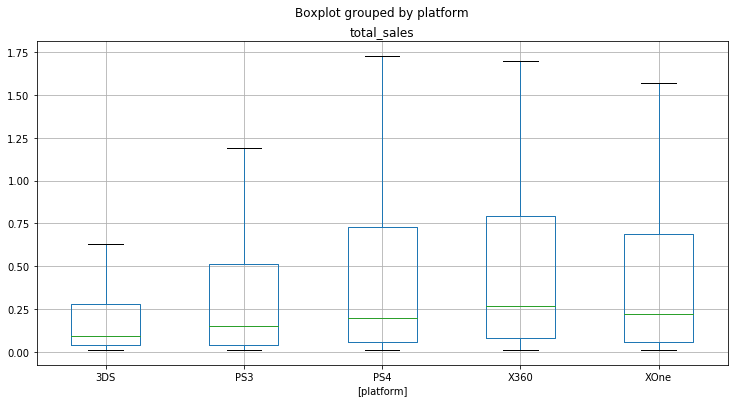

In [43]:
data_for_boxplot.boxplot(by="platform", showfliers=False, figsize =(12, 6));

Характер распределения продаж во всех основных активно продававшихся в 2013-2016 гг. платформах примерно одинаков. Скошенность вправо выражена предельно явно. Подавляющее большинство игр продаются в относительно небольших количествах (имеют сравнительно малые тиражи). По мере роста числа продаж, количество таких, коммерчески более удачных, игр синжается. Вместе с тем, именно в "выбросы" попадают наиболее удачные, с рыночной точки зрения, игры.

Также видно, что наибольшим рыночным успехом в период 2013-2016 гг. пользовались игры, созданные на платфолрмах PS3, X360 и 3DX (по одной игре на каждой из платформ превысили 14 млн продаж). Но надо помнить, что X360, как было определено выше, уже находится на излете жизненного цикла.

Важно и то, что только на платформах 3DS, PS4 и X360 целых две игры превысили уровень продаж в 10 млн экз.

**«Ящик с усами» по глобальным продажам наиболее популярных платформ**

Рассмотрим распределение продаж в динамике по наиболее перспективной и массовой PS4 и несколько отстающей от нее XOne. которая уже прошла свой пик продаж.

Сначала **PS4**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


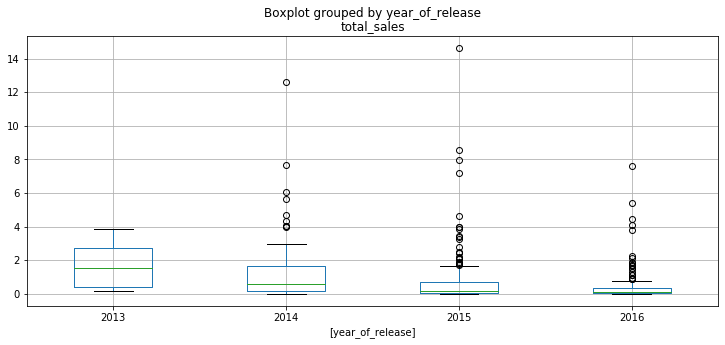

In [44]:
platform_dyn = data.query('platform=="PS4" and year_of_release > 2012')
platform_dyn_fig = platform_dyn.filter(['year_of_release', 'total_sales'], axis=1)
platform_dyn_fig.boxplot(by="year_of_release", figsize =(12, 5));

Затем **XOne**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


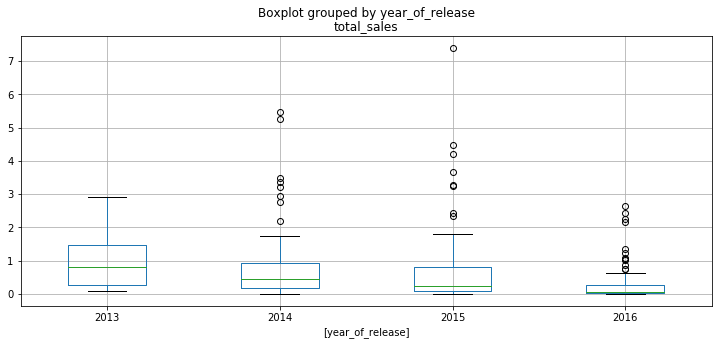

In [45]:
platform_dyn = data.query('platform=="XOne" and year_of_release > 2012')
platform_dyn_fig = platform_dyn.filter(['year_of_release', 'total_sales'], axis=1)
platform_dyn_fig.boxplot(by="year_of_release", figsize =(12, 5));

В динамике обе платформы демонстрируют схлжие особенности в развитии.
1. Начальный период характеризуется тем, что разброс в популярности (продажах) новых игр на платформе не слишком велик (выбросов нет вообще, а продажи наиболее удачных игр отличаются от медианы в разы, но не на порядок).
2. Далее следуют два года наиболее динамичного развития. В это время создаются игры, которые продаются тиражами в 10 и более раз превосходящими медианные значения. Коммерческий успех становится проявлением статистического "выброса": чем дальше выброс, тем сильнее игра оторвалась от соплатформенных конкурентов.
3. Четвертый год в обоих случаях стал годом сжатия. С одной стороны, это может объяснятся неполнотой данных за 2016 год. Но с другой стороны, есть непроверенные сведения, что база 2016 года сформирована по состоянию на 222 декабря. В итоге мы можем лишь констатировать, что после двух лет яркого роста наблюдается торможение и, возможно, снижение результатов не только лидеров, но и основной массы новых игр.

### Связь между продажами платформ и отзывами пользователей и критиков

#### Расчет по наиболее популярной платформе

В качестве популярной платформы примем для анализа корреляций PS4.

In [46]:
data.loc[data['platform'] == 'PS4', 'year_of_release'].value_counts()

2016    164
2015    137
2014     75
2013     16
Name: year_of_release, dtype: int64

Игры на платформе начали продпаваться в 2013 году. Четыре года - тот самый период, который ранее был принят для анализа.

Расчеты проведем по "чистым" данным, не искаженным заполнением пропусков на основании косвенных признаков.

*Технические коды для отсечки отсутствующих оценок: 0, 100 (для пользователей) и 500 (для критиков)*.

Расчет по **отзывам пользователей**

Коэффициент корреляции: -0.031957110204556424
Размер выборки: 257


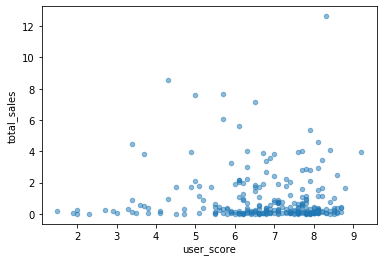

In [47]:
data_ps4_users = data.loc[(data['platform'] == 'PS4') & (data['user_score'] > 0) & (data['user_score'] < 100)]

corr = data_ps4_users['user_score'].corr(data_ps4_users['total_sales'])
print(f'Коэффициент корреляции: {corr}')

dimension = len(data_ps4_users['total_sales'])
print(f'Размер выборки: {dimension}')

data_ps4_users.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5);

In [48]:
data_ps4_users['user_score'].describe()

count    257.000000
mean       6.748249
std        1.459481
min        1.500000
25%        6.100000
50%        7.000000
75%        7.800000
max        9.200000
Name: user_score, dtype: float64

Расчет по **оценкам критиков**

Коэффициент корреляции: 0.40656790206178095


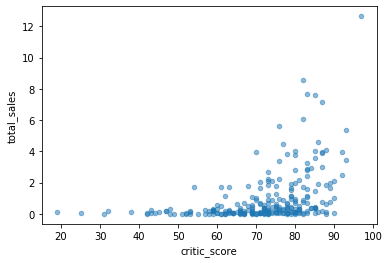

In [49]:
data_ps4_critic = data.loc[(data['platform'] == 'PS4') & (data['critic_score'] > 0) & (data['critic_score'] < 500)]

corr = data_ps4_critic['critic_score'].corr(data_ps4_critic['total_sales'])
print(f'Коэффициент корреляции: {corr}')

data_ps4_critic.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5);

In [50]:
data_ps4_users['critic_score'].describe()

count    257.00000
mean      69.88716
std       17.61078
min        0.00000
25%       65.00000
50%       73.00000
75%       80.00000
max       97.00000
Name: critic_score, dtype: float64

**Констатации**

1. Корреляции между отзывами пользователей и продажами нет. Половина оценок лежит в диапазоне от 6,1 до 7,8 по 10-балльной шкале.
2. Корреляция между оценками критиков и продажами есть. Она не абсолютна, но вполне отчетлива. Половина оценок критиков лежит в диапазоне от 65 до 80 по 100-балльной шкале.
3. Средние оценки, с учетом разной размерности шкал, практически равны: 6,75 и 69,9.

**Заключения**

Что является причиной и что следствием во взаимной связи (корреляции) оценки критиков и объемов продаж, на основании имеющихся данных сказать невозможно. Вместе с тем, понимая, что критики оценивают игры вскоре после их выхода в продажу, оценки критиков всё же первична, они не выставляются по итогам рыночных успехов. Однако, с уверенностью утверждать, что именно оценки критиков становятся определяющими факторами роста продаж, тоже нельзя: удачная игра находит своего массового покупателя и без поддержки в виде оценки критиков, которая, в конечном итоге, является лишь одним из факторов рыночного успеха игры.

Отсутствие корреляции между продажами и оценками пользователей характеризует, скорее, пользователей, чем ту или иную игру. Людям свойственно давать преимущественно негативные оценки, если что-то не нравится. Если все хорошо, то доля людей, которые не поленятся и выствят высоку, значительно ниже, чем среди тех, кому не нравится что-то. Плюс к тому могут быть и факторы разочарования: например, покупка на основании оценки критиков, завышенные ожидания и, как следствие, неоправдавшиеся надежды. В итоге, оценка пользователей оказывается необъективной.

Таким образом, профессиональные оценки, действительно, могут предрекать (но не обеспечивать) коммерческий успех игры. Пользовательские оценки не имеют существенной практической ценности.

#### Соотнесение выводов с продажами на других платформах

Посчитаем корреляции по двум другим ведущим платформам: XOne и 3DS, а также по всей остальной совокупности платформ (кроме тройки лидеров).

Расчет по **XOne**

In [51]:
data_ps4_users = data.loc[(data['platform'] == 'XOne') & (data['user_score'] > 0) & (data['user_score'] < 100)]

corr = data_ps4_users['user_score'].corr(data_ps4_users['total_sales'])
print(f'Коэффициент корреляции продаж с оценками пользователей: {corr}')

dimension = len(data_ps4_users['total_sales'])
print(f'Размер выборки: {dimension}')

Коэффициент корреляции продаж с оценками пользователей: -0.06892505328279414
Размер выборки: 182


In [52]:
data_ps4_critic = data.loc[(data['platform'] == 'XOne') & (data['critic_score'] > 0) & (data['critic_score'] < 500)]

corr = data_ps4_critic['critic_score'].corr(data_ps4_critic['total_sales'])
print(f'Коэффициент корреляции продаж с оценками критиков: {corr}')

Коэффициент корреляции продаж с оценками критиков: 0.4169983280084017


Расчет по **3DS**

In [53]:
data_ps4_users = data.loc[(data['platform'] == '3DS') & (data['user_score'] > 0) & (data['user_score'] < 100)]

corr = data_ps4_users['user_score'].corr(data_ps4_users['total_sales'])
print(f'Коэффициент корреляции продаж с оценками пользователей: {corr}')

dimension = len(data_ps4_users['total_sales'])
print(f'Размер выборки: {dimension}')

Коэффициент корреляции продаж с оценками пользователей: 0.22480798039571082
Размер выборки: 174


In [54]:
data_ps4_critic = data.loc[(data['platform'] == '3DS') & (data['critic_score'] > 0) & (data['critic_score'] < 500)]

corr = data_ps4_critic['critic_score'].corr(data_ps4_critic['total_sales'])
print(f'Коэффициент корреляции продаж с оценками критиков: {corr}')

Коэффициент корреляции продаж с оценками критиков: 0.3494009303924131


**Вывод**: расчеты корреляции по двум другим ведущим платформам XOne и 3DS в целом подтверждают ранее сделанные заключения:
1. имеет место умеренная положительная корреляция объемов продаж с оценками критиков,
2. корреляция объемов продаж с оценками пользователей по наиболее крупным платформам не выявлена (положительный коэффициент корреляции 0,23 по наименее продаваемой платформе из трех (3DS) мал (меньше порогового значения значимости в 0,25).

Расчет по всем **остальным платформам** (кроме PS4, XOne, 3DS)

Коэффициент корреляции: 0.0928463722751166
Размер выборки: 6976


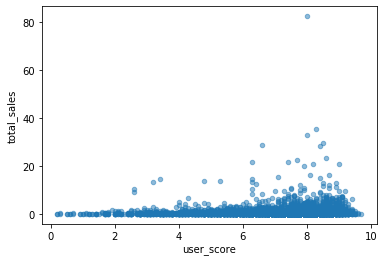

In [55]:
data_users = data.loc[(data['platform'] != 'PS4') & (data['platform'] != 'XOne') & (data['platform'] != '3DS') 
                      & (data['user_score'] > 0) & (data['user_score'] < 100)]

corr = data_users['user_score'].corr(data_users['total_sales'])
print(f'Коэффициент корреляции: {corr}')

dimension = len(data_users['total_sales'])
print(f'Размер выборки: {dimension}')

data_users.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5);

Коэффициент корреляции: 0.23693410917923494


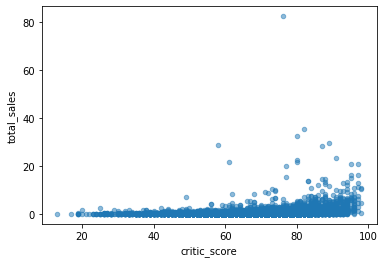

In [56]:
data_critic = data.loc[(data['platform'] != 'PS4') & (data['platform'] != 'XOne') & (data['platform'] != '3DS')
                       & (data['critic_score'] > 0) & (data['critic_score'] < 500)]

corr = data_critic['critic_score'].corr(data_critic['total_sales'])
print(f'Коэффициент корреляции: {corr}')

data_critic.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5);

**Вывод**: расчеты корреляции по остальным платформам (кроме PS4, XOne и 3DS) имеет две особенности:
1. остальные платформы демонстрируют значительно более слабую (менее 25%) корреляцию между продажами и оценками критиков,
2. корреляция объемов продаж с оценками пользователей по остальным платформам практически отсутствует, но в зоне незначимых малых значений она выше, чем по ведущим играм (9% против нуля).

**Итоговые заключения**

Наиболее популярные игры демонстрируют положительную связь между оценками критиков и тиражами продаж (корреляция около 40%). Однако по мере снижения уровня продаж платформ корреляция снижается до незначительной. Это говорит о премлемости учета оценок критиков при прогнозе продаж игр на наиболее массовых платформах (для менее коммерчески удачливых платформ эта закономерность не работает).

Продажи игр на наиболее популярных платформах никак не коррелируют с пользовательскими оценками, но и на менее коммерчески успешных платформах корреляция ничтожна (незначительна).


### Распределение игр по жанрам

In [57]:
# Отбор данных
genre_4_years = data_4_years.pivot_table(index='genre', values='total_sales', aggfunc='sum')

# Расчет рыночной доли по жанрам
total_sales_2013_2016 = genre_4_years['total_sales'].sum()
genre_4_years['market_share'] = genre_4_years['total_sales'] / total_sales_2013_2016 * 100

genre_4_years = genre_4_years.sort_values(by='total_sales', ascending=False)
display(genre_4_years)

,total_sales,market_share
genre,,
Action,322.50,29.544872
Shooter,232.98,21.343765
Sports,150.65,13.801349
Role-Playing,145.89,13.365275
Misc,63.06,5.777053
Platform,42.63,3.905420
Racing,39.89,3.654403
Fighting,35.31,3.234820
Adventure,23.64,2.165708


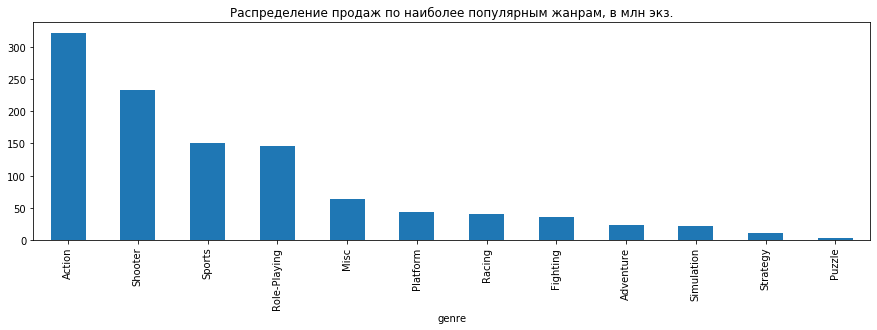

In [58]:
genre_4_years['total_sales'].plot(kind='bar',
                                  figsize =(15, 4), title='Распределение продаж по наиболее популярным жанрам, в млн экз.');

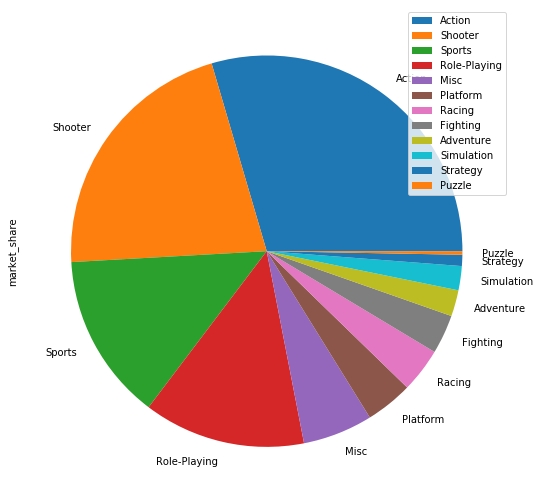

In [59]:
genre_4_years.plot(y='market_share', kind='pie', figsize =(9, 9));

**Выводы**
1. Распределение продаж по жанрам неравномерно.
2. Наиболее распространен жанр Action - почти 30% рынка дают продажи игр в этом жанре.
3. Четыре жанра из двенадцати (Action, Shooter, Role-Playing и Sports) занимают 78% рынка.
4. Наименее популярны жанры Puzzle (0,3%) и Strategy (0,92%).

Таким образом, на основе статистики 2013-2016 годов, наиболее перспективны в 2017 г. продажи лидирующих жанров: Action, Shooter, Role-Playing и Sports. Продажами в жанраж Puzzle и Strategy можно пренебречь и не тратить ресурсы на их продвижение.

Рассмотрим средние и медианные продажи по основным жанрам. В каждом жанре они покажут, каковы тиражи продаж игр-середняков.

,mean,median
genre,,
Shooter,1.245882,0.450
Sports,0.703972,0.240
Platform,0.576081,0.225
Role-Playing,0.499623,0.125
Fighting,0.441375,0.125
Racing,0.469294,0.120
Action,0.419376,0.110
Misc,0.404231,0.105
Simulation,0.350968,0.100


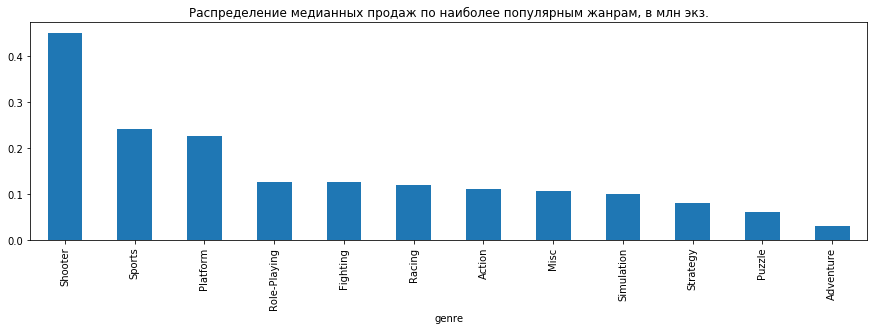

In [60]:
genre_4_years_median = data_4_years.pivot_table(index='genre', values='total_sales', aggfunc=('mean', 'median')).\
        sort_values(by='median', ascending=False)

display(genre_4_years_median)

genre_4_years_median['median'].plot(kind='bar',
                                figsize =(15, 4), 
                                title='Распределение медианных продаж по наиболее популярным жанрам, в млн экз.');

**Выводы**
1. Распределение тиражей игр-середняков по жанрам неравномерно.
2. Лучшие показатели у жанра Shooter: средний тираж 1,25 млн экз, мединанный - 450 тыс. экз.
3. Жанры второго эшелона среди середняков: Sports и Platform. Их средние триажи в мире - всего 600-700 тыс. экз., а медианнные 220-240 тыс. экз.
4. Наименее тиражны середняки в жанре Adventure (средний тираж менее 100 тыс., а медианный всего 30 тыс. экз. по всему миру).

Таким образом, кроме продаж наиболее тиражных (популярных, пользующихся наибольшим спросом) игр в жанрах Action, Shooter, Role-Playing и Sports магазин может позволить себе продажи менее тиражных игр в этих же жанрах, рискнув добавить к ним и игры в жанре Platform. Но учитывая сравнительно небольшие продажи (наиболее интересные магазину игры продаются тиражами свыше 10 млн экз.), рассчитывать на заметный доход от них вряд ли получится.

## Шаг 4. Составление портрета пользователя каждого региона

In [61]:
# Создаем функцию-процедуру для стандартного расчета по региону.
# На входе строковое наименование колонки с регионом продаж, 
#          совпадающее с названием колонки по региональным продажам (например, 'na_sales').
def regional_preferences(region):
    #   Отбор датасета для региона
    data_4_years_reg = data_4_years.loc[data_4_years[region] > 0]
    
    #   Формирование таблицы по платформам   
    platforms_4_years = data_4_years_reg.pivot_table(index='platform', values=region, aggfunc='sum')
    
    regional_total_sales = platforms_4_years[region].sum() # суммарные продажи по региону
        # Расчет рыночной доли по платформам
    platforms_4_years['market_share'] = platforms_4_years[region] / regional_total_sales * 100
    
    platforms_4_years = platforms_4_years.sort_values(by=region, ascending=False)
    print('Рэнкинг популярности платформ', platforms_4_years, sep='\n')
        
    #   Формирование таблицы по жанрам
    genres_4_years = data_4_years_reg.pivot_table(index='genre', values=region, aggfunc='sum')
    genres_4_years['market_share'] = genres_4_years[region] / regional_total_sales * 100
    genres_4_years = genres_4_years.sort_values(by=region, ascending=False)
    print()
    print('Рэнкинг популярности жанров', genres_4_years, sep='\n')
    
    #   Формирование таблицы по рейтингам ESRB
    ratings_4_years = data_4_years.pivot_table(index='rating', values=region, aggfunc='sum')
    ratings_4_years['market_share'] = ratings_4_years[region] / regional_total_sales * 100
    ratings_4_years = ratings_4_years.sort_values(by=region, ascending=False)
    print()
    print('Рэнкинг предпочтений по рейтингам ESRB', ratings_4_years, sep='\n')
    
    # Подготовка сводных данных по рыночным долям
    code = region[0:2]
    plat_4_years = table_processor(platforms_4_years, code)
    genr_4_years = table_processor(genres_4_years, code)
    rat_4_years = table_processor(ratings_4_years, code)
    return(plat_4_years, genr_4_years, rat_4_years)    

In [62]:
# Вспомогательная функция для сокращения таблицы с показателями (в итоге остается только рыночная доля) 
# и присвоения кода региона колонке с рыночной долей
def table_processor(table, code):
    table = table.reset_index()
    table.drop(table.columns[[1]], axis = 1, inplace = True)
    table.rename(columns={'market_share': code}, inplace=True)
    return(table)

### Регион "Северная Америка"

In [63]:
p_na, g_na, r_na = regional_preferences('na_sales')

Рэнкинг популярности платформ
          na_sales  market_share
platform                        
PS4         108.74     24.838393
XOne         93.12     21.270472
X360         81.66     18.652779
PS3          63.50     14.504671
3DS          38.20      8.725645
WiiU         29.21      6.672149
PC           11.19      2.556020
Wii           6.56      1.498435
PSV           5.04      1.151237
DS            0.57      0.130199

Рэнкинг популярности жанров
              na_sales  market_share
genre                               
Action          126.13     28.810617
Shooter         109.74     25.066813
Sports           65.27     14.908975
Role-Playing     46.40     10.598689
Misc             27.49      6.279266
Platform         18.14      4.143539
Fighting         15.55      3.551931
Racing           12.96      2.960323
Adventure         7.14      1.630919
Simulation        4.86      1.110121
Strategy          3.28      0.749218
Puzzle            0.83      0.189589

Рэнкинг предпочтений по ре

**Портрет североамериканца**:

* Приоритетные жанры: Action и Shooter (вместе более 50% рынка). Пользуются наименьшим спросом: Adventure, Simulation, Strategy и Puzzle.
* Приритетные платформы: PS4 и XOne (47% рынка). Пользуются наименьшим спросом: Wii, PSV и DS (вместе менее 3%).
* По рейтингу ESRB предпочтение отдается категории M (около 38%), значительна доля игр без рейтинга (более 20%).

### Регион "Европа"

In [64]:
p_eu, g_eu, r_eu = regional_preferences('eu_sales')

Рэнкинг популярности платформ
          eu_sales  market_share
platform                        
PS4         141.09     35.927275
PS3          67.81     17.267195
XOne         51.59     13.136920
X360         42.52     10.827328
3DS          30.96      7.883680
PC           25.84      6.579919
WiiU         19.85      5.054620
PSV           6.10      1.553309
Wii           5.93      1.510020
DS            0.85      0.216445
PSP           0.17      0.043289

Рэнкинг популярности жанров
              eu_sales  market_share
genre                               
Action          118.61     30.202949
Shooter          87.86     22.372743
Sports           60.52     15.410863
Role-Playing     36.97      9.414071
Racing           20.19      5.141198
Misc             20.04      5.103002
Platform         15.58      3.967304
Simulation       10.92      2.780678
Fighting          8.55      2.177179
Adventure         8.25      2.100787
Strategy          4.22      1.074584
Puzzle            1.00      0.2

**Портрет европейца**:

* Приоритетные жанры: Action и Shooter (вместе почти 53% рынка). Пользуются наименьшим спросом: Fighting, Adventure, Strategy и Puzzle.
* Приритетные платформы: PS4 (36%) и PS3 (17% рынка). Пользуются наименьшим спросом: PSV, Wii, DS и PSP (вместе менее 4%).
* По рейтингу ESRB предпочтение отдается категориям M (около 37%) и Е (около 21%), также значительна доля игр без рейтинга (около 20%).

### Регион "Япония"

In [65]:
p_jp, g_jp, r_jp = regional_preferences('jp_sales')

Рэнкинг популярности платформ
          jp_sales  market_share
platform                        
3DS          67.81     48.085378
PS3          23.35     16.557935
PSV          18.59     13.182527
PS4          15.96     11.317544
WiiU         10.88      7.715218
PSP           3.53      2.503191
X360          0.51      0.361651
XOne          0.34      0.241101
Wii           0.05      0.035456

Рэнкинг популярности жанров
              jp_sales  market_share
genre                               
Role-Playing     51.04     36.193448
Action           40.49     28.712239
Misc              9.44      6.694086
Fighting          7.65      5.424762
Shooter           6.61      4.687278
Adventure         5.82      4.127074
Sports            5.41      3.836335
Platform          4.79      3.396681
Simulation        4.52      3.205219
Racing            2.30      1.630974
Strategy          1.77      1.255141
Puzzle            1.18      0.836761

Рэнкинг предпочтений по рейтингам ESRB
           jp_sales 

**Портрет японца**:

* Предпочитает жанры Role-Playing и Action (вместе почти 65% рынка). Как правило, проходит мимо Racing, Strategy и Puzzle (около 3,7% вместе).
* Очень уважительно относится к платформам 3DS (48%) и PS3 (почти 17% рынка). Совсем низко ценит X360, XOne и Wii, DS и PSP (вместе менее 1%).
* Игрок из страны восходящего солнца "не признает" рейтинг ESRB, ему он безразличен, и более 60% игр продаются без присвоенного рейтинга.

### Сводные (сравнительные) данные по регионам

**Сравнение популярности платформ**

In [66]:
plat = pd.merge(p_na, p_eu, on='platform', how='outer')
plat = plat.merge(p_jp, on='platform', how='outer').fillna(0).sort_values(by='platform')
display(plat)

,platform,na,eu,jp
4,3DS,8.725645,7.883680,48.085378
9,DS,0.130199,0.216445,0.000000
6,PC,2.556020,6.579919,0.000000
3,PS3,14.504671,17.267195,16.557935
0,PS4,24.838393,35.927275,11.317544
10,PSP,0.000000,0.043289,2.503191
8,PSV,1.151237,1.553309,13.182527
7,Wii,1.498435,1.510020,0.035456
5,WiiU,6.672149,5.054620,7.715218
2,X360,18.652779,10.827328,0.361651


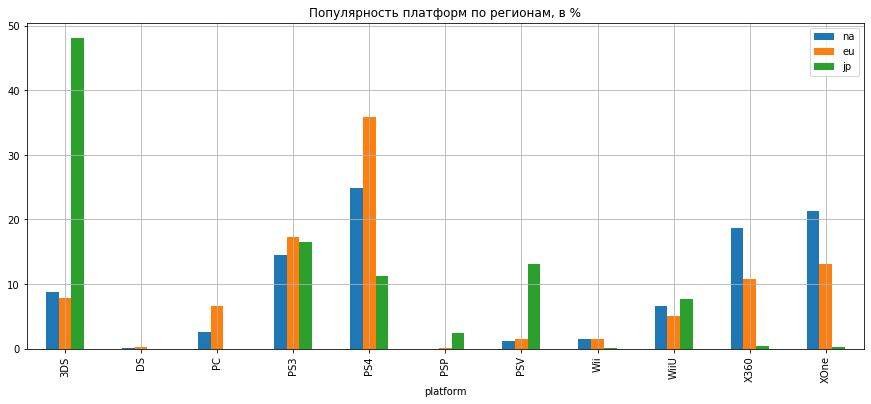

In [67]:
plat.plot(kind='bar', x='platform', grid=True, figsize =(15, 6), title='Популярность платформ по регионам, в %');

**Сравнение популярности жанров**

In [68]:
gen = pd.merge(g_na, g_eu, on='genre', how='outer')
gen = gen.merge(g_jp, on='genre', how='outer').fillna(0).sort_values(by='genre')
display(gen)

,genre,na,eu,jp
0,Action,28.810617,30.202949,28.712239
8,Adventure,1.630919,2.100787,4.127074
6,Fighting,3.551931,2.177179,5.424762
4,Misc,6.279266,5.103002,6.694086
5,Platform,4.143539,3.967304,3.396681
11,Puzzle,0.189589,0.254641,0.836761
7,Racing,2.960323,5.141198,1.630974
3,Role-Playing,10.598689,9.414071,36.193448
1,Shooter,25.066813,22.372743,4.687278
9,Simulation,1.110121,2.780678,3.205219


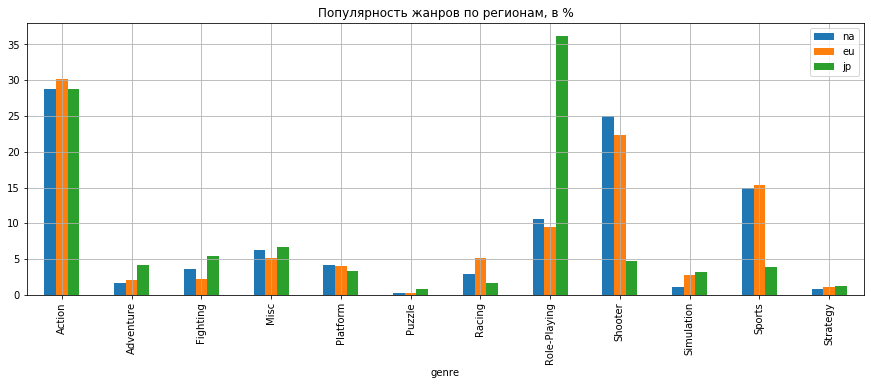

In [69]:
gen.plot(kind='bar', x='genre', grid=True, figsize =(15, 5), title='Популярность жанров по регионам, в %');

**Сравнение популярности рейтингов**

In [70]:
rat = pd.merge(r_na, r_eu, on='rating', how='outer')
rat = rat.merge(r_jp, on='rating', how='outer').fillna(0).sort_values(by='rating')
display(rat)

,rating,na,eu,jp
2,E,18.056602,21.226860,10.736066
3,E10+,12.389502,10.870617,4.176713
0,M,37.755545,37.126633,10.005673
4,T,11.373033,10.682183,14.600766
1,not_rated,20.425318,20.093708,60.480783


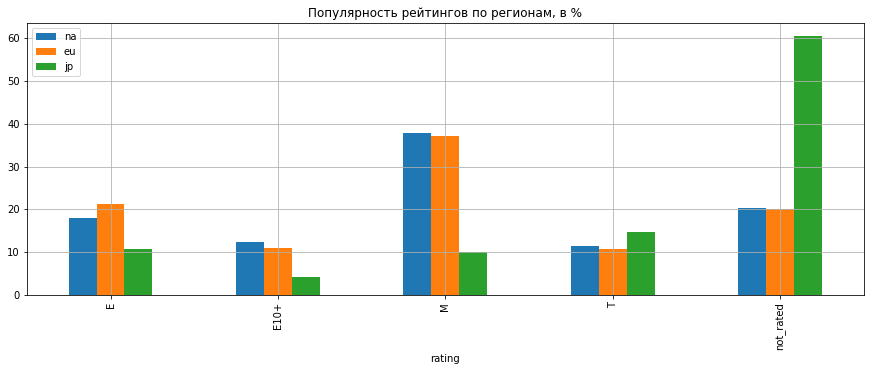

In [71]:
rat.plot(kind='bar', x='rating', grid=True, figsize =(15, 5), title='Популярность рейтингов по регионам, в %');

### Выводы

1. Европейский и американский потребители во многом схожи. Приоритетными жанрами являются практически одни и те же: Action и Shooter. В платформах отдается предпочтение PS4 и XOne (в Европе по-прежнему в почете также PS3). Игры с рейтингами M и E пользуются наибольшим спросом на обеих континентах. Впрочем, в Северной Америке велика доля (20%) игр без рейтинга (что несколько парадоксально, т.е. организация ESRB создана для работы на США и Канаду.
2. Японские потребители имеют существенные отличия в предпочтениях как в части жарнов, так и в части используемых платформ. Отношение к североамериканскому рейтингу ESRB - нейтральное (этот рейтинг в Японии является факультативным, значимого влияния не оказывает).
3. В конечном итоге, при формировании целевых портфелей продаж по георегионам Северную Америку и Европу можно считать едиными (за исключением некоторых второстепенных аспектов). В свою очередь, японский рынок весьма специфичен и при продажах (поставках) требует учета этой специфики.

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

"Нулевая" гипотеза: пользовательские рейтинги платформ Xbox One и PC совпадают.

Альтернативная (Н1) гипотеза: пользовательские рейтинги платформ Xbox One и PC отличаются. Гипотеза двусторонняя (ненаправленная).

Подготовим данные с учетом того, что для целей исследования важны актуальные оценки, то есть те, которые получили игры периода 2013-2016 годов (т.е. примем в качестве базы последние 4 года имеющейся базы данных)

In [72]:
# Отсекаем "технические" оценки
data_4_years_real = data_4_years.loc[(data['user_score'] > 0) & (data['user_score'] < 100)]

In [73]:
array_xone = data_4_years_real.loc[data_4_years_real['platform'] == 'XOne']['user_score']
array_pc = data_4_years_real.loc[data_4_years_real['platform'] != 'PC']['user_score']

print(f'Размеры выборок:\
    \nXbox One: {len(array_xone)}\nPC: {len(array_pc)}')

Размеры выборок:    
Xbox One: 182
PC: 1037


Учитывая значительные (более 50) объемы выборок, установим пороговое значение alpha на уровне 5%.

In [74]:
p_value = st.ttest_ind(array_xone, array_pc, equal_var=False).pvalue
print(f'Уровень статистической значимости: {p_value:%}')

Уровень статистической значимости: 33.280299%


In [75]:
array_xone.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [76]:
array_pc.describe()

count    1037.000000
mean        6.631630
std         1.585279
min         0.200000
25%         5.800000
50%         7.000000
75%         7.800000
max         9.300000
Name: user_score, dtype: float64

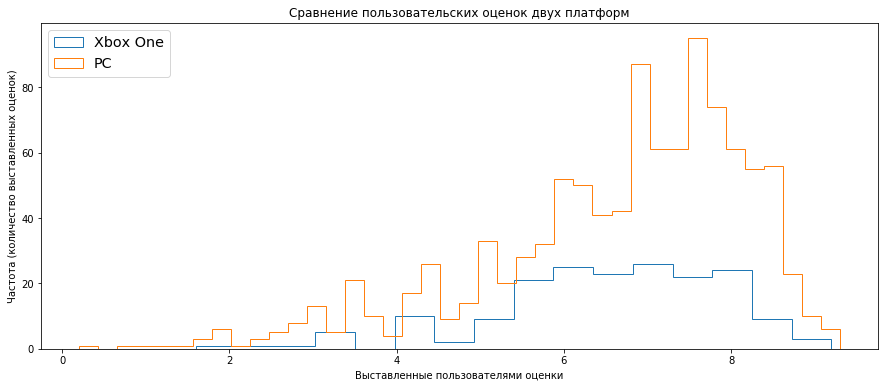

In [77]:
array_xone.plot(kind='hist', histtype='step', bins=16, title='Сравнение пользовательских оценок двух платформ',\
                 label='Xbox One', figsize=(15, 6))
array_pc.plot(kind='hist', histtype='step', bins=40, label='PC')
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel('Выставленные пользователями оценки')
plt.ylabel('Частота (количество выставленных оценок)');

Полученное в результате t-теста значените уровня статистической значимости, равное 33% существенно превышает пороговое значение, принятое на уровне 5%. Таким образом, нет оснований опровергнуть "нулевую" гипотезу: пользовательские рейтинги платформ Xbox One и PC совпадают.

Этот результат подтверждается и другими статистическими данными по обеим выборкам. Средние пользовательские оценки для XOne и PC равны, соответственно, 6,5 и 6,6, а мединанные - 6,8 и 7,0.

###  Средние пользовательские рейтинги жанров Action и Sports разные

"Нулевая" гипотеза: пользовательские рейтинги жанров Action и Sports совпадают.

Альтернативная (Н1) гипотеза: пользовательские рейтинги жанров Action и Sports отличаются. Гипотеза двусторонняя (ненаправленная).

In [78]:
array_action = data_4_years_real.loc[data_4_years_real['genre'] == 'Action']['user_score']
array_sports = data_4_years_real.loc[data_4_years_real['genre'] == 'Sports']['user_score']

print(f'Размеры выборок:\
    \nAction: {len(array_action)}\nSports: {len(array_sports)}')

Размеры выборок:    
Action: 392
Sports: 160


Учитывая значительные (более 50) объемы выборок, установим пороговое значение alpha на уровне 5%.

In [79]:
p_value = st.ttest_ind(array_action, array_sports, equal_var=False).pvalue
print(f'Уровень статистической значимости: {p_value:%}')

Уровень статистической значимости: 0.000000%


In [80]:
array_action.describe()

count    392.000000
mean       6.837500
std        1.329076
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [81]:
array_sports.describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

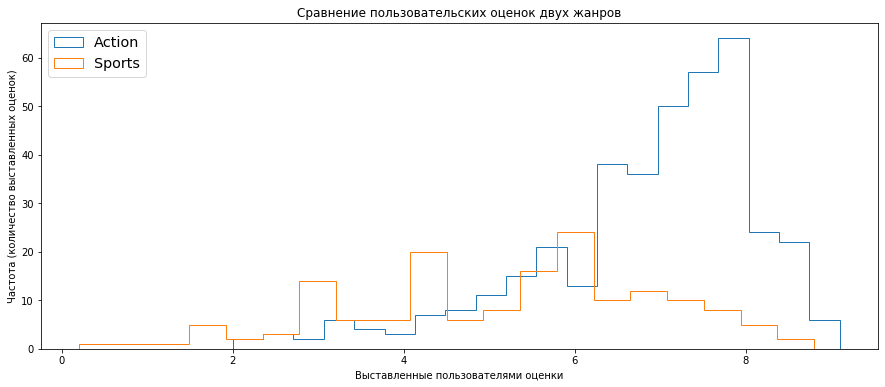

In [82]:
array_action.plot(kind='hist', histtype='step', bins=20, title='Сравнение пользовательских оценок двух жанров',\
                 label='Action', figsize=(15, 6))
array_sports.plot(kind='hist', histtype='step', bins=20, label='Sports')
plt.legend(loc='upper left', fontsize='x-large')
plt.xlabel('Выставленные пользователями оценки')
plt.ylabel('Частота (количество выставленных оценок)');

Полученное в результате t-теста значените уровня статистической значимости, равное фактитчески нулю, никак недодтягивает до порогового значения, принятого на уровне 5%. Таким образом, есть всеские основания усомниться в "нулевой" гипотезе. То есть пользовательские рейтинги жанров Action и Sports, скорее всего, не совпадают.

Этот результат подтверждается и другими статистическими данными по обеим выборкам. Средние пользовательские оценки для Action и Sports различаются - они равны 6,8 и 5,2 соответственно. Также различаются и медианные - они равны 7,1 и 5,5. Диаграммы распределения также не дают аргументы в пользу нулевой гипотезы.

### Выводы по итогам проверки гипотез

1. Предположение о том, что пользователи одинаково оценивают игры на платформах XOne и PC не было опровергнуто.
2. Предположение о том, что пользователи одинаково оцениваюти жанры Action и Sports, скорее всего, несостоятельно.
3. Схожесть распределения пользовательских оценок игр на разных платформах согласуется с ранее сделанным выводом об отсутствии связи между пользовательскими оценками и количеством проданных игр.
4. Различие в оценках пользователей двух из трех наиболее популярных жанров (Action - 1 и Sports - 3) является достаточным основанием, чтобы с осторожностью относиться к пользовательским оценкам в жанровом аспекте.
5. Всё это в совокупности приводит к заключению о том, что оценки пользователей не стоит принимать во внимание при планировании будущих продаж.

## Шаг 6. Общий вывод

1.	Рынок продаж компьютерных игр, по тенденции 2013-2016 годов, находится на спаде, предпосылок для перелома тенденции не выявлено. Уровень продаж соответствует примерно середине 1990-х годов.
2.	Производство новых игр в 2013-2016 годах стабильно, что на сжимающемся рынке ведет к росту конкуренции производителей. В этот период каждая новая игра в среднем выпускается почти на двух платформах (в двух вариантах), что ведет к большему разнообразию предложения.
3.	В 2017 году следует ориентироваться на умеренно-пессимистический сценарий – продажи игр будут стагнировать.
4.	Средняя длительность жизненного цикла большинства основных платформ составляет примерно 8 лет. Все платформы, на которых выпускаются игры в 2016 году, либо подошли к концу своего жизненного цикла, либо находятся в его нисходящей фазе. Наиболее «молодые» платформы: PS4 и XOne. 
5.	Лидируют по продажам игровые платформы PS4 (рыночная доля по итогам полностью завершившегося 2015 года 44%), XOne (22%) и 3DS (10%). Таким образом, имеет место существенная концентрация: более 75% рынка занимают игры, созданные на трех платформах.
6.	Можно предположить, что платформы PS4 и XOne будут наиболее продаваемыми в 2017 г. Однако новые игры на этих платформах, скорее всего, будут пользоваться меньшим спросом, чем их более старшие соплотформенные предшественники. Вместе с тем, велика вероятность появления в 2017 г. новых игровых платформ, которые, в силу спада на рынке, скорее всего, будут развитием действующих PS4 и XOne. Но игры, созданные на новых и обновленных платформах в 2017 году, еще не будут иметь пикового спроса.
7.	Таким образом, в рекламе следует делать акцент на игры на платформах PS4 и XOne, а также сформировать бюджетный резерв на случай выхода в свет игр на новых и обновленных платформах.
8.	Рынок игр Японии специфичен, в отличие от рынков США и Европы, которые очень близки между собой по предпочтениям покупателей. Интернет-магазину «Стримчик» следует ориентироваться на американско-европейские предпочтения.
9.	Наиболее предпочтительные жанры для продвижения рекламой: Action, Shooter, Sports и Role-Playing.
10.	При появлении новых игр следует прислушаться к оценкам критиков: как правило, высокие оценки критиков получают те игры, которые имеют высокий потенциал продаж. Но это относится только к играм на наиболее успешных с коммерческой точки зрения платформах (положительная корреляция между оценками критиков и продажами игр на сравнительно низкотиражных платформах снижается до незначительной, ее можно не принимать во внимание).
11.	Ориентироваться на мнение (оценки) покупателей не имеет большого смысла (их оценки неинформативны – вне зависимости от коммерческого успеха платформы).
12.	Наибольшим спросом будут продолжать пользоваться игры, которые получили категории M и E североамериканского рейтинга ESRB. Будут оставаться популярными также и игры без рейтингов.
13.	В конечном итоге, наиболее перспективными в 2017 году будут продажи игр, созданных на платформах **PS4** и **XOne** (а также, возможно, на новых или обновленных платформах) в жанрах **Action**, **Shooter**, **Sports** и **Role-Playing**. Наиболее востребованными будут категории **M** и **E** рейтинговой системы ESRB (но и игры **без рейтинга** также будут пользоваться достаточно высоким спросом). Исходя из этих констатаций целесообразно планировать рекламно-маркетинговый бюджет и формировать (готовить) соответствующие акценты в рекламе.